In [148]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [149]:
house = pd.read_csv(r'/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [150]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [151]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [152]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [153]:
house.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [154]:
house.value_counts

<bound method DataFrame.value_counts of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandCo

In [155]:
# handling null values

In [156]:
null_values = house.isnull().sum()
null_values

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [157]:
null_value_percentage = house.isnull().sum()*100/len(house)
null_value_percentage

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [158]:
house["LotFrontage"] = house["LotFrontage"].fillna(house["LotFrontage"].mean())

In [159]:
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [160]:
cat_df = house.select_dtypes(include="object")
cat_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [161]:
num_df = house.select_dtypes(include="number")
num_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [162]:
corr_df=num_df.corr()
corr_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.009601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.009601,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179700,0.215828,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,-0.033226,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.179700,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


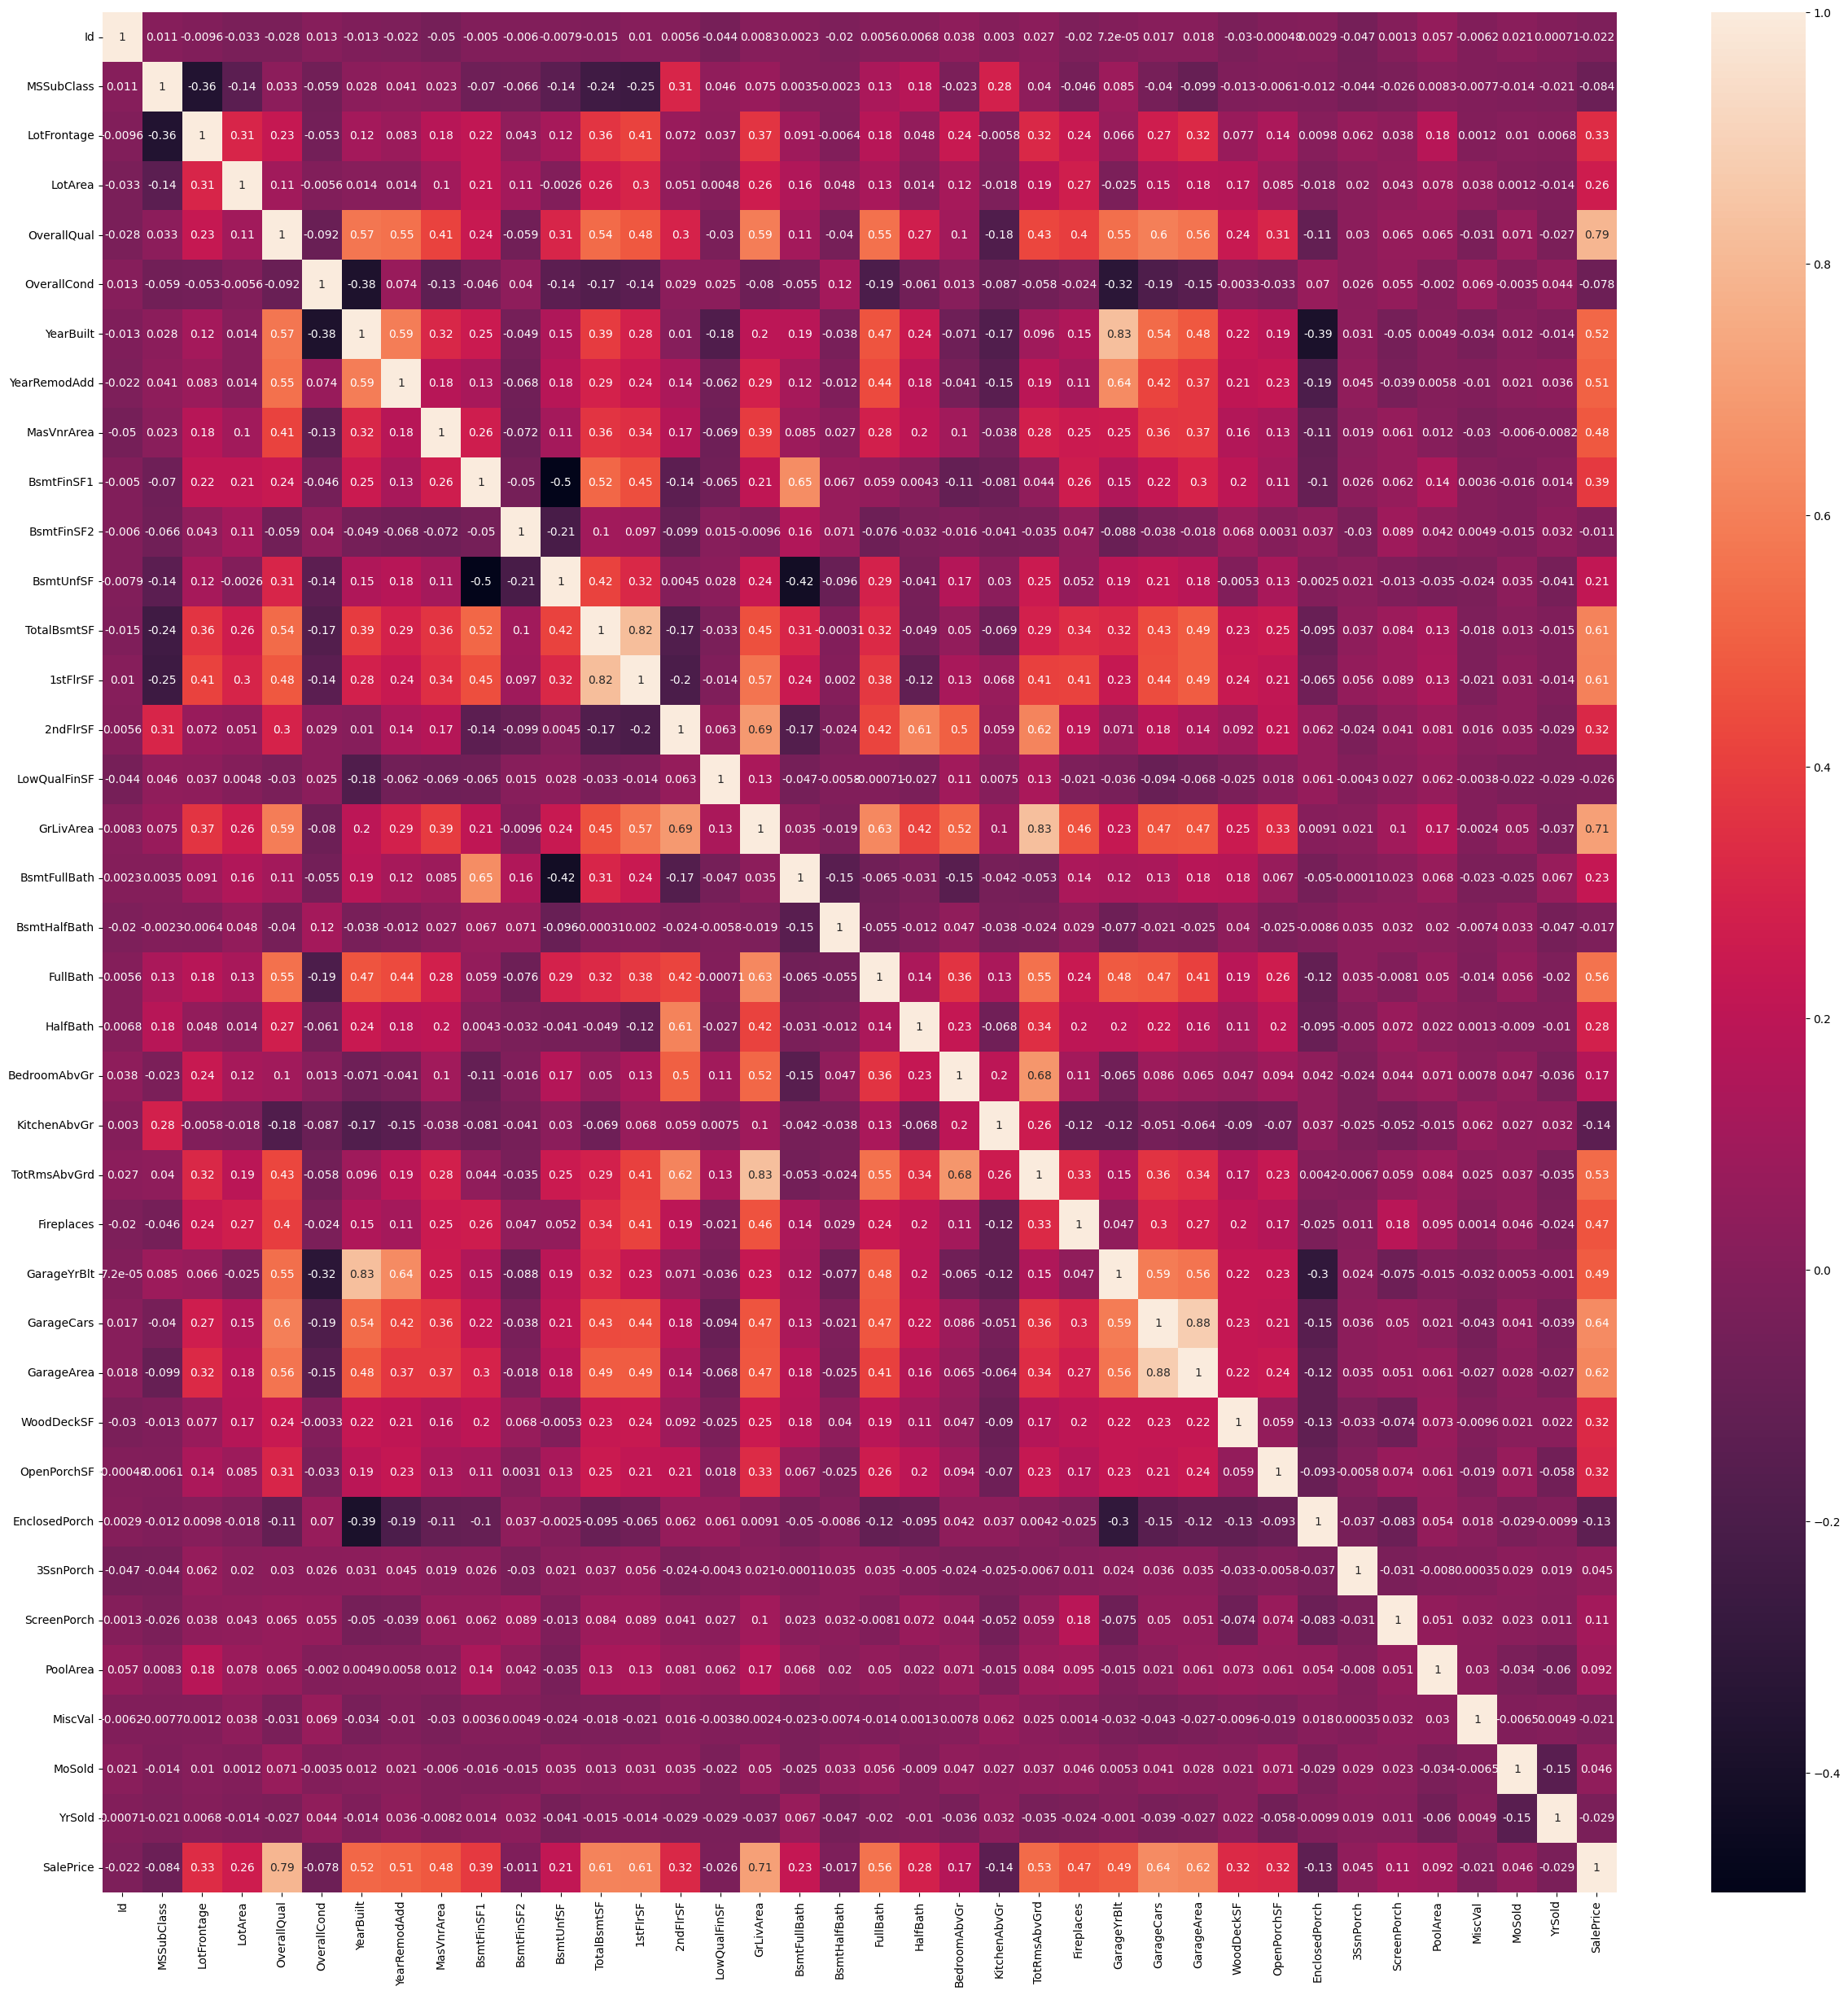

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30, 30))
sns.heatmap(data=corr_df, annot=True)
plt.show()


In [164]:
house.shape

(1460, 81)

In [165]:
cat_df.isnull().sum()*100/len(cat_df)

MSZoning          0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinType2      2.602740
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.068493
KitchenQual       0.000000
Functional        0.000000
FireplaceQu      47.260274
GarageType        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageCond        5.547945
P

In [166]:
cat_df.drop(["Alley","MasVnrType","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [168]:
cat_df.isnull().sum()*100/len(cat_df)

MSZoning         0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functional       0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64

In [169]:
num_df.isnull().sum()*100/len(num_df)

Id               0.000000
MSSubClass       0.000000
LotFrontage      0.000000
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.547945
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageYrBlt      5.547945
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SalePrice        0.000000
dtype: float

In [170]:
num_df.drop(["Id","3SsnPorch","LowQualFinSF","MiscVal","MoSold","YrSold","EnclosedPorch","BsmtHalfBath",],axis=1,inplace=True)

In [171]:
num_df["GarageYrBlt"]=num_df["GarageYrBlt"].fillna(num_df["GarageYrBlt"].mean())

In [172]:
num_df["MasVnrArea"]=num_df["MasVnrArea"].fillna(num_df["MasVnrArea"].mean())

In [173]:
house.isnull().sum()*100/len(house)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
                ... 
MoSold           0.0
YrSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
Length: 81, dtype: float64

In [174]:
cat_df.isnull().sum()*100/len(cat_df)

MSZoning         0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
KitchenQual      0.0
Functional       0.0
GarageType       0.0
GarageFinish     0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
SaleType         0.0
SaleCondition    0.0
dtype: float64

In [175]:
num_df.isnull().sum()*100/len(num_df)

MSSubClass      0.0
LotFrontage     0.0
LotArea         0.0
OverallQual     0.0
OverallCond     0.0
YearBuilt       0.0
YearRemodAdd    0.0
MasVnrArea      0.0
BsmtFinSF1      0.0
BsmtFinSF2      0.0
BsmtUnfSF       0.0
TotalBsmtSF     0.0
1stFlrSF        0.0
2ndFlrSF        0.0
GrLivArea       0.0
BsmtFullBath    0.0
FullBath        0.0
HalfBath        0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
TotRmsAbvGrd    0.0
Fireplaces      0.0
GarageYrBlt     0.0
GarageCars      0.0
GarageArea      0.0
WoodDeckSF      0.0
OpenPorchSF     0.0
ScreenPorch     0.0
PoolArea        0.0
SalePrice       0.0
dtype: float64

In [176]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Handiling outliners -- 

In [177]:
house["LotFrontage"].describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [178]:
Q1=house["LotFrontage"].describe().values[4]
Q3=house["LotFrontage"].describe().values[6]
IQR=Q3 -Q1
print(IQR)

19.0


In [179]:
upper_threshould=Q3+(1.5*IQR)
upper_threshould

107.5

In [180]:
lower_threshould=Q1 - (1.5*IQR)
lower_threshould

31.5

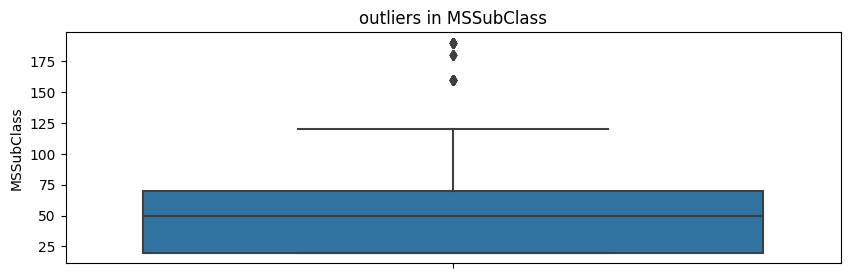

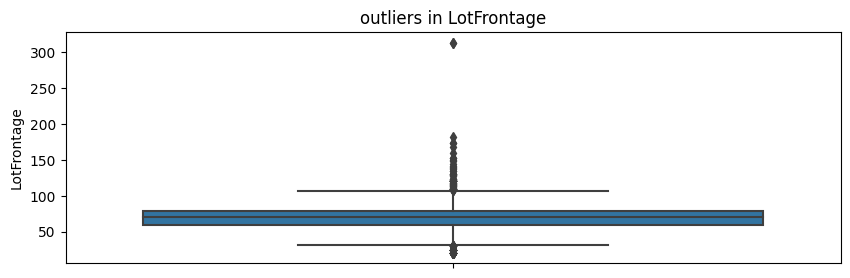

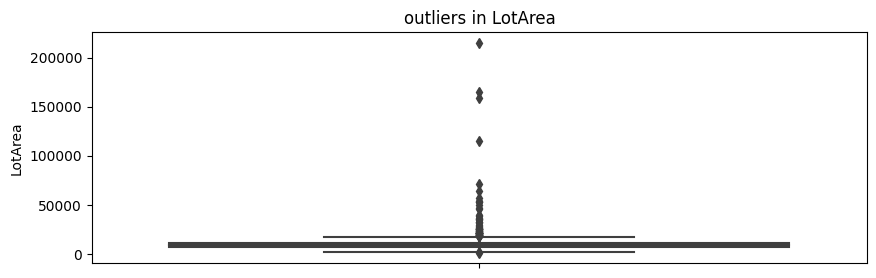

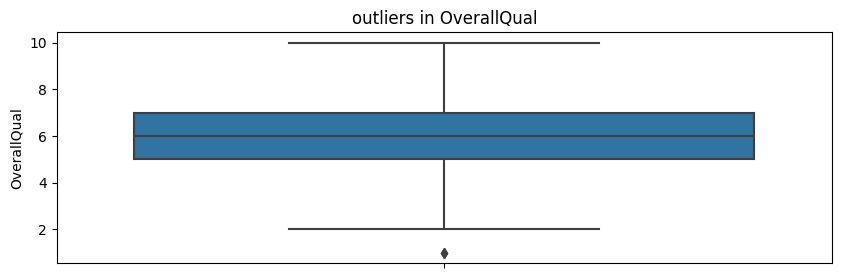

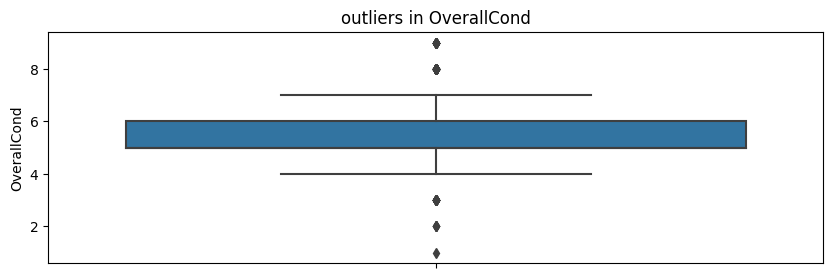

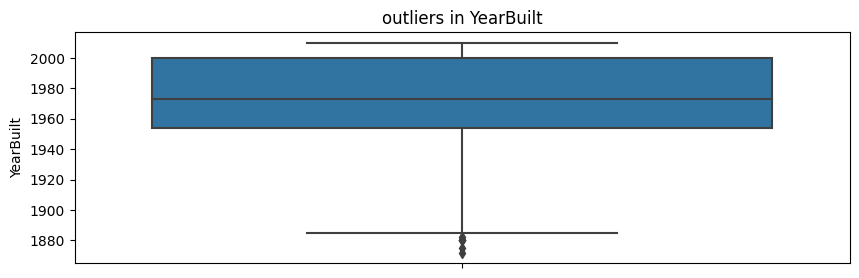

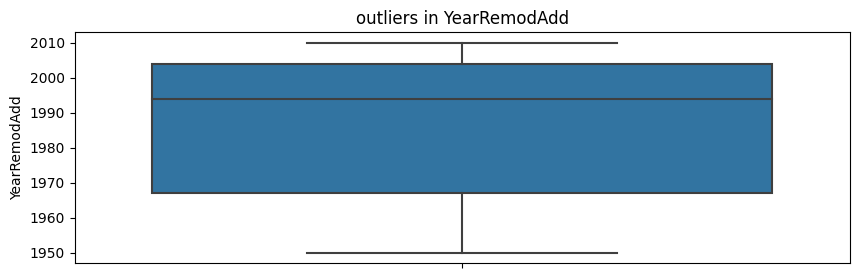

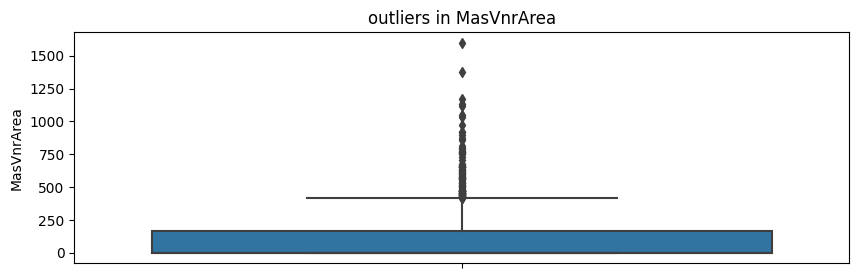

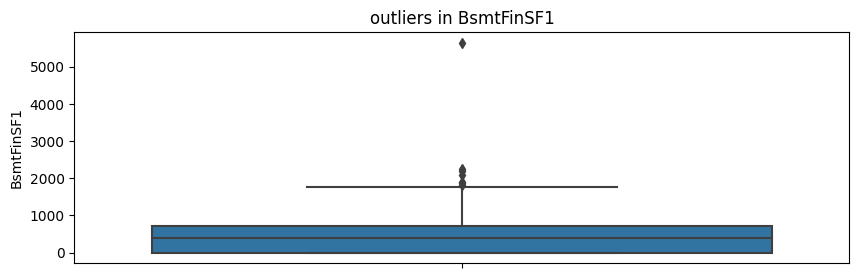

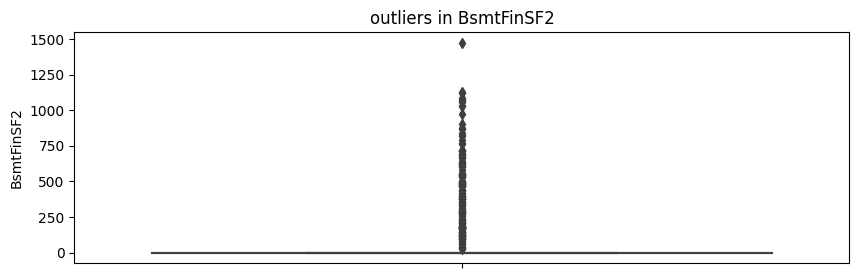

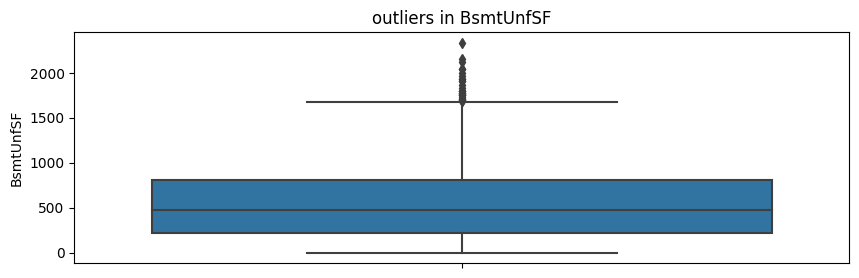

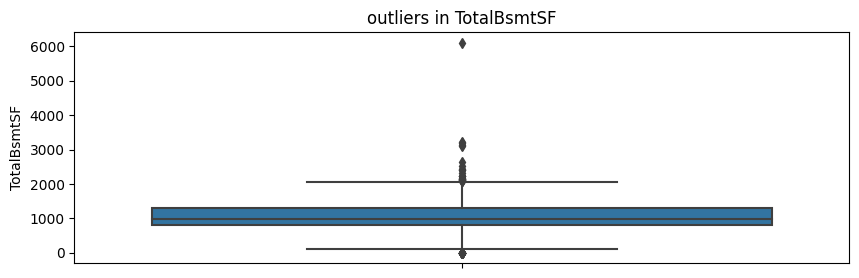

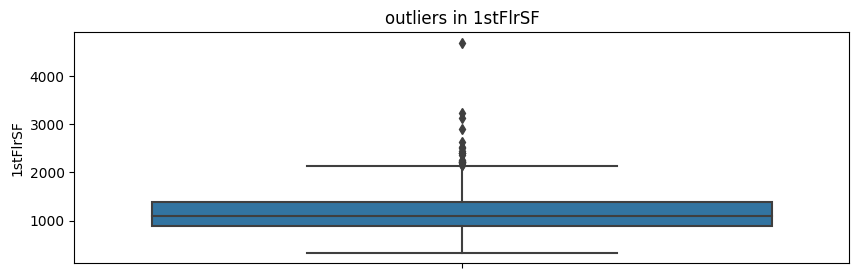

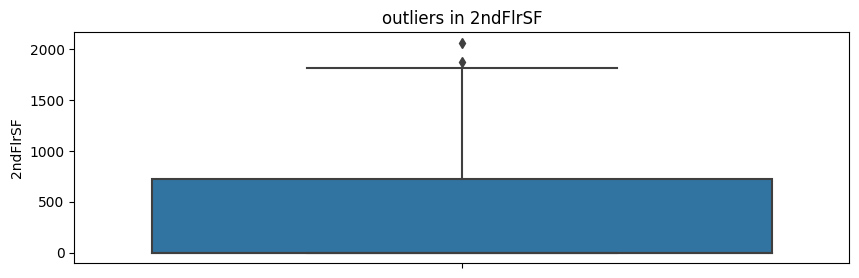

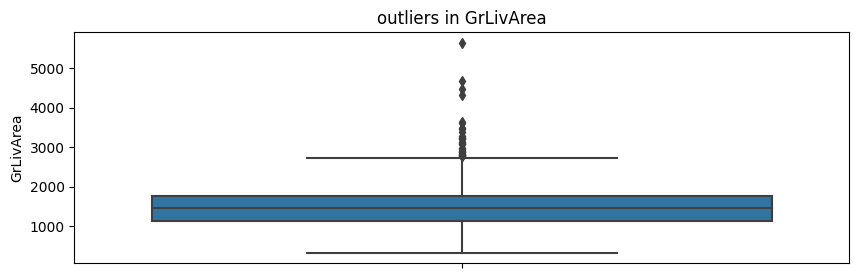

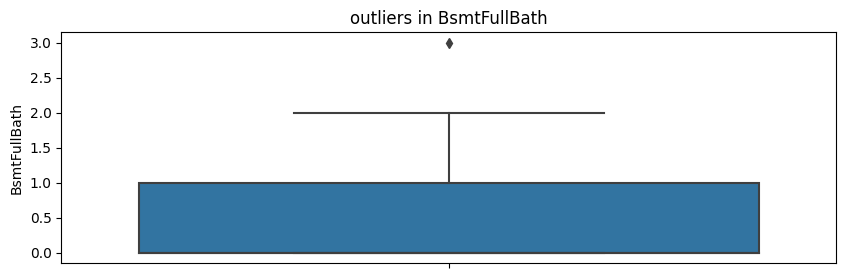

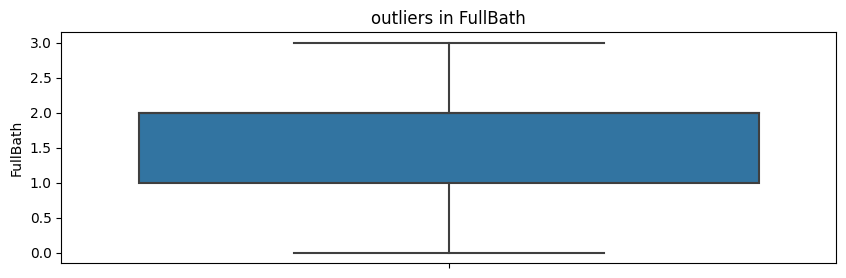

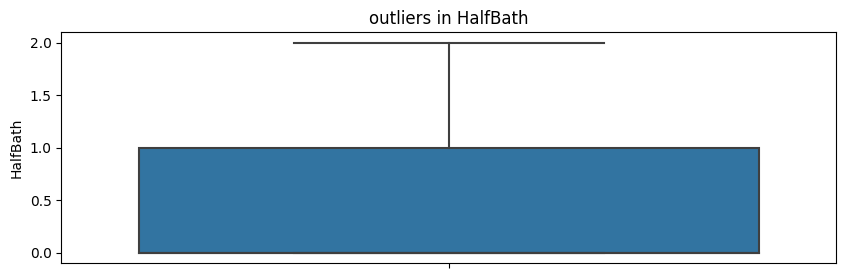

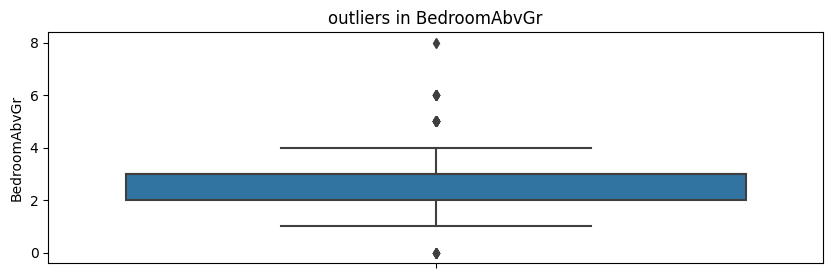

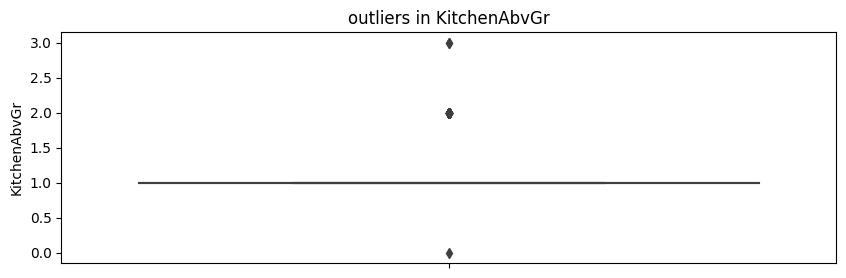

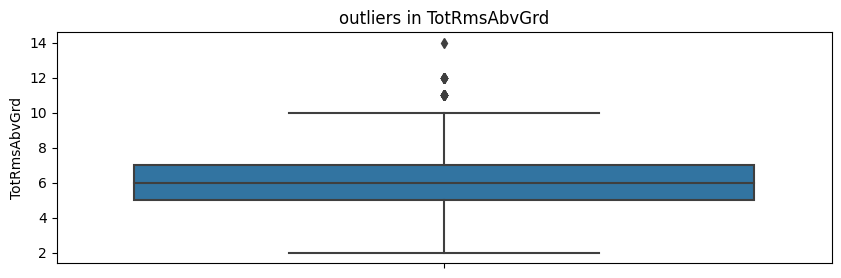

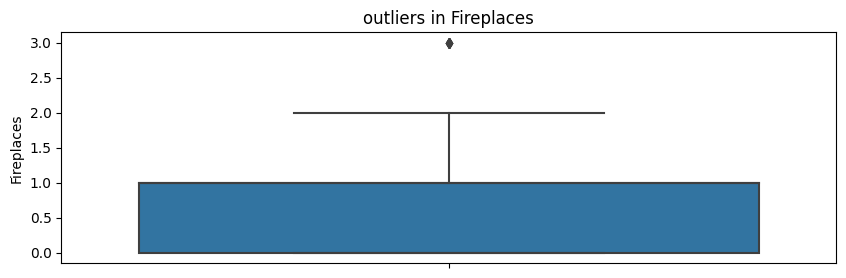

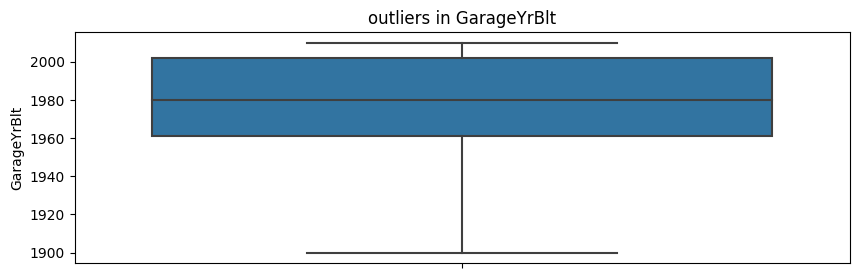

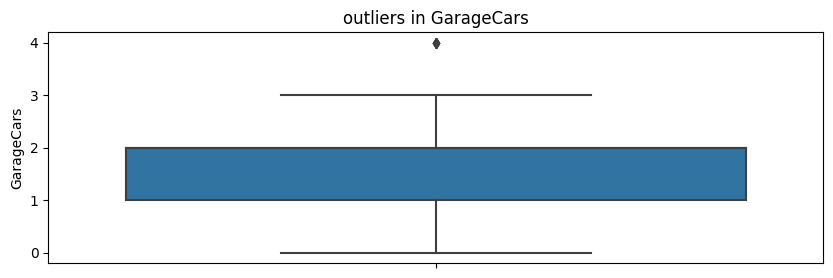

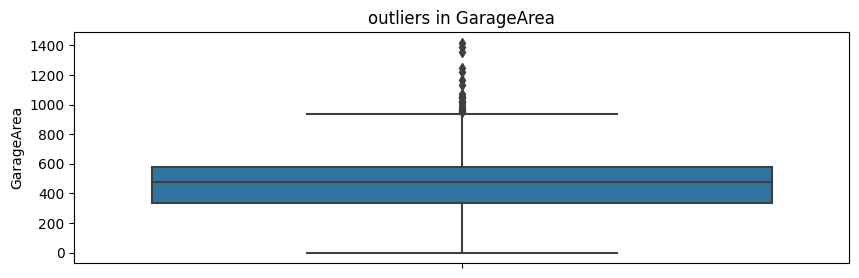

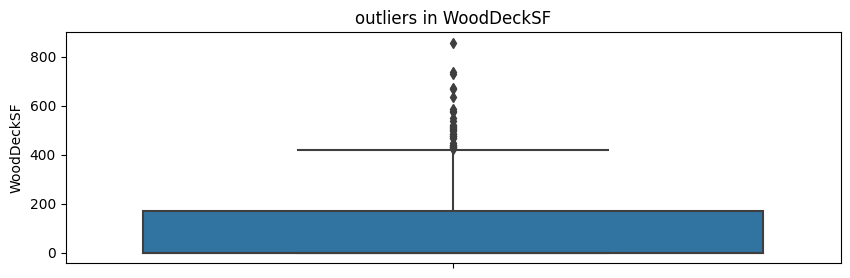

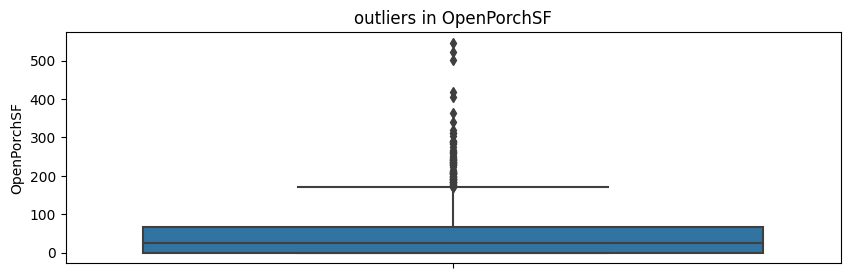

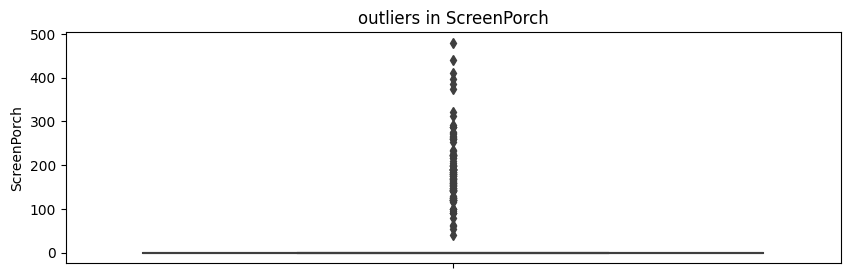

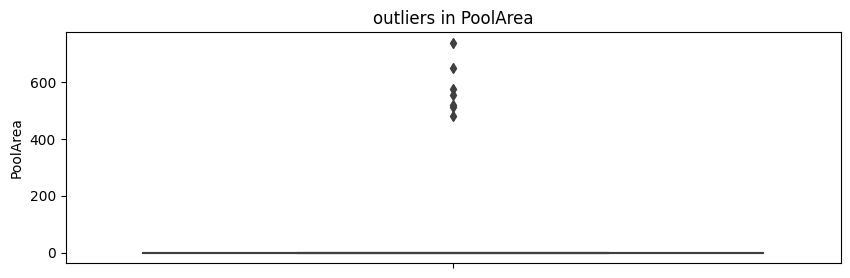

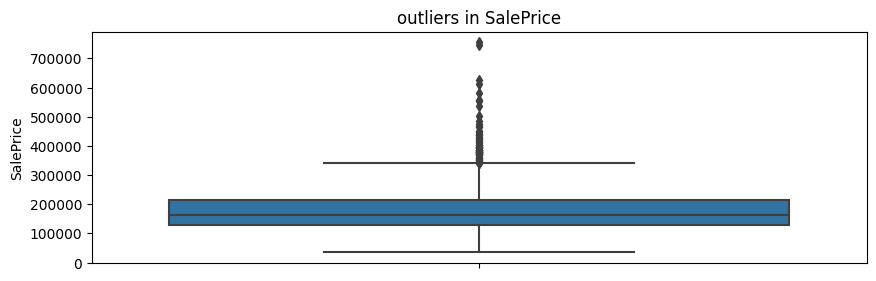

In [181]:
for col in num_df:
    plt.figure(figsize=(10, 3))
    sns.boxplot(y=house[col])
    plt.title(f"outliers in {col}")
    plt.ylabel(col)
    plt.show()


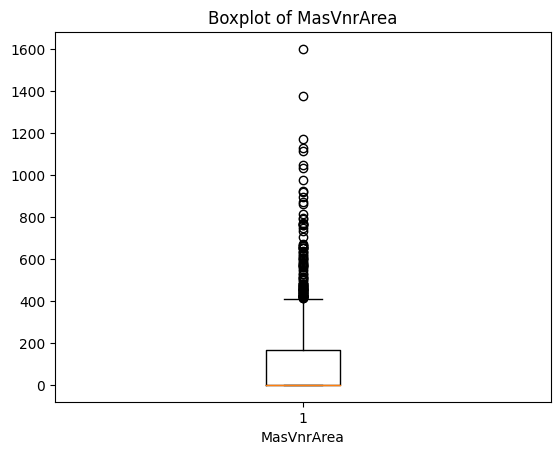

In [182]:
import matplotlib.pyplot as plt

plt.boxplot(num_df["MasVnrArea"])
plt.title("Boxplot of MasVnrArea")
plt.xlabel("MasVnrArea")
plt.show()

In [183]:
num_df["MasVnrArea"].describe()

count    1460.000000
mean      103.685262
std       180.569112
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [184]:
Q1=num_df["MasVnrArea"].describe().values[4]
Q3=num_df["MasVnrArea"].describe().values[6]
IQR=Q3-Q1
IQR

164.25

In [185]:
upper=Q3 +  (1.5 *IQR)
lower= Q1 - (1.5*IQR)

In [186]:
# Step 3: Cap values
num_df['MasVnrArea'] = num_df['MasVnrArea'].clip(lower=lower, upper=upper)
num_df['MasVnrArea']

0       196.0
1         0.0
2       162.0
3         0.0
4       350.0
        ...  
1455      0.0
1456    119.0
1457      0.0
1458      0.0
1459      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

In [187]:
num_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'PoolArea', 'SalePrice'],
      dtype='object')

In [188]:
cat_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [189]:
num_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,8,0,2003.0,2,548,0,61,0,0,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,6,1,1976.0,2,460,298,0,0,0,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,6,1,2001.0,2,608,0,42,0,0,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,7,1,1998.0,3,642,0,35,0,0,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,9,1,2000.0,3,836,192,84,0,0,250000


In [190]:
house=pd.concat([cat_df,num_df],axis=1)
house

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,8,0,2003.0,2,548,0,61,0,0,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,6,1,1976.0,2,460,298,0,0,0,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,6,1,2001.0,2,608,0,42,0,0,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,7,1,1998.0,3,642,0,35,0,0,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,9,1,2000.0,3,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,7,1,1999.0,2,460,0,40,0,0,175000
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,7,2,1978.0,2,500,349,0,0,0,210000
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,9,2,1941.0,1,252,0,60,0,0,266500
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,5,0,1950.0,1,240,366,0,0,0,142125


In [191]:
house.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea,SalePrice
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,8,0,2003.0,2,548,0,61,0,0,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,6,1,1976.0,2,460,298,0,0,0,181500


In [192]:
house.isnull().sum()

MSZoning       0
Street         0
LotShape       0
LandContour    0
Utilities      0
              ..
WoodDeckSF     0
OpenPorchSF    0
ScreenPorch    0
PoolArea       0
SalePrice      0
Length: 67, dtype: int64

In [193]:
house.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'ScreenPorch', 

In [194]:
Y=house["SalePrice"]    # dependent column
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [195]:
# in-dependent columns-----
X=house[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'ScreenPorch', 'PoolArea']]
X

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,1,8,0,2003.0,2,548,0,61,0,0
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,1,6,1,1976.0,2,460,298,0,0,0
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,1,6,1,2001.0,2,608,0,42,0,0
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,1,7,1,1998.0,3,642,0,35,0,0
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,1,9,1,2000.0,3,836,192,84,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,1,7,1,1999.0,2,460,0,40,0,0
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,1,7,2,1978.0,2,500,349,0,0,0
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,1,9,2,1941.0,1,252,0,60,0,0
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,1,5,0,1950.0,1,240,366,0,0,0


In [196]:
cat_x_columns=X.select_dtypes(include=["object"])
num_x_columns=X.select_dtypes(include=["int","float"])

In [197]:
cat_x_columns

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [198]:
num_x_columns

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,1,8,0,2003.0,2,548,0,61,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1,6,1,1976.0,2,460,298,0,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,1,6,1,2001.0,2,608,0,42,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1,7,1,1998.0,3,642,0,35,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,1,9,1,2000.0,3,836,192,84,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,1,7,1,1999.0,2,460,0,40,0,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,1,7,2,1978.0,2,500,349,0,0,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,1,9,2,1941.0,1,252,0,60,0,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,1,5,0,1950.0,1,240,366,0,0,0


In [199]:
train_ordinal_cols = [
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",

    "Functional",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    
    "PavedDrive",
    "LotShape",
    "LandSlope"
]
train_ordinal_cols

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'LotShape',
 'LandSlope']

In [200]:
train_ordinal_cols=cat_x_columns[train_ordinal_cols].copy()

In [201]:
train_ordinal_cols

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,LotShape,LandSlope
0,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,Typ,RFn,TA,TA,Y,Reg,Gtl
1,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,Typ,RFn,TA,TA,Y,Reg,Gtl
2,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,Typ,RFn,TA,TA,Y,IR1,Gtl
3,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,Typ,Unf,TA,TA,Y,IR1,Gtl
4,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,Typ,RFn,TA,TA,Y,IR1,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,TA,Gd,TA,No,Unf,Unf,Ex,TA,Typ,RFn,TA,TA,Y,Reg,Gtl
1456,TA,TA,Gd,TA,No,ALQ,Rec,TA,TA,Min1,Unf,TA,TA,Y,Reg,Gtl
1457,Ex,Gd,TA,Gd,No,GLQ,Unf,Ex,Gd,Typ,RFn,TA,TA,Y,Reg,Gtl
1458,TA,TA,TA,TA,Mn,GLQ,Rec,Gd,Gd,Typ,Unf,TA,TA,Y,Reg,Gtl


In [202]:
for col in train_ordinal_cols.columns:
    print(f"Column: {col}")
    print("Unique Values:", train_ordinal_cols[col].unique())
    print("*" * 50)   # prints 50 stars

Column: ExterQual
Unique Values: ['Gd' 'TA' 'Ex' 'Fa']
**************************************************
Column: ExterCond
Unique Values: ['TA' 'Gd' 'Fa' 'Po' 'Ex']
**************************************************
Column: BsmtQual
Unique Values: ['Gd' 'TA' 'Ex' 'Fa']
**************************************************
Column: BsmtCond
Unique Values: ['TA' 'Gd' 'Fa' 'Po']
**************************************************
Column: BsmtExposure
Unique Values: ['No' 'Gd' 'Mn' 'Av']
**************************************************
Column: BsmtFinType1
Unique Values: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'LwQ']
**************************************************
Column: BsmtFinType2
Unique Values: ['Unf' 'BLQ' 'ALQ' 'Rec' 'LwQ' 'GLQ']
**************************************************
Column: HeatingQC
Unique Values: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
**************************************************
Column: KitchenQual
Unique Values: ['Gd' 'TA' 'Ex' 'Fa']
**********************************************

In [203]:
ordinal_mapping = {
    'LotShape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
    'LandSlope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},

    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},

    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},

    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},

    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},

    'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},

    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},

    'PavedDrive': {'Y': 3, 'P': 2, 'N': 1}
}
ordinal_mapping

# Apply mapping to dataframe
for col, mapping in ordinal_mapping.items():
    if mapping is not None:
        train_ordinal_cols[col] = train_ordinal_cols[col].map(mapping)

In [204]:
train_ordinal_cols

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,LotShape,LandSlope
0,4,3,4,3,1,6,1,5,4,8,2,3,3,3,4,3
1,3,3,4,3,4,5,1,5,3,8,2,3,3,3,4,3
2,4,3,4,3,2,6,1,5,4,8,2,3,3,3,3,3
3,3,3,3,4,1,5,1,4,4,8,1,3,3,3,3,3
4,4,3,4,3,3,6,1,5,4,8,2,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,3,4,3,1,1,1,5,3,8,2,3,3,3,4,3
1456,3,3,4,3,1,5,3,3,3,7,1,3,3,3,4,3
1457,5,4,3,4,1,6,1,5,4,8,2,3,3,3,4,3
1458,3,3,3,3,2,6,3,4,4,8,1,3,3,3,4,3


In [205]:
train_nominal_cols = cat_x_columns[[
    'MSZoning','Street','LandContour','Utilities','LotConfig',
    'Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
    'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation',
    'Heating','CentralAir','Electrical','GarageType','SaleType','SaleCondition'
]]
train_nominal_cols

,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,RoofMatl,Exterior1st,Exterior2nd,Foundation,Heating,CentralAir,Electrical,GarageType,SaleType,SaleCondition
0,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,...,CompShg,VinylSd,VinylSd,PConc,GasA,Y,SBrkr,Attchd,WD,Normal
1,RL,Pave,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,...,CompShg,MetalSd,MetalSd,CBlock,GasA,Y,SBrkr,Attchd,WD,Normal
2,RL,Pave,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,...,CompShg,VinylSd,VinylSd,PConc,GasA,Y,SBrkr,Attchd,WD,Normal
3,RL,Pave,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,...,CompShg,Wd Sdng,Wd Shng,BrkTil,GasA,Y,SBrkr,Detchd,WD,Abnorml
4,RL,Pave,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,...,CompShg,VinylSd,VinylSd,PConc,GasA,Y,SBrkr,Attchd,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Lvl,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,...,CompShg,VinylSd,VinylSd,PConc,GasA,Y,SBrkr,Attchd,WD,Normal
1456,RL,Pave,Lvl,AllPub,Inside,NWAmes,Norm,Norm,1Fam,1Story,...,CompShg,Plywood,Plywood,CBlock,GasA,Y,SBrkr,Attchd,WD,Normal
1457,RL,Pave,Lvl,AllPub,Inside,Crawfor,Norm,Norm,1Fam,2Story,...,CompShg,CemntBd,CmentBd,Stone,GasA,Y,SBrkr,Attchd,WD,Normal
1458,RL,Pave,Lvl,AllPub,Inside,NAmes,Norm,Norm,1Fam,1Story,...,CompShg,MetalSd,MetalSd,CBlock,GasA,Y,FuseA,Attchd,WD,Normal


In [206]:
train_nominal_cols=pd.get_dummies(train_nominal_cols)
train_nominal_cols

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1456,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1457,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1458,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [207]:
cat_x_columns= pd.concat([train_ordinal_cols, train_nominal_cols], axis=1)
cat_x_columns

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4,3,4,3,1,6,1,5,4,8,...,False,False,False,True,False,False,False,False,True,False
1,3,3,4,3,4,5,1,5,3,8,...,False,False,False,True,False,False,False,False,True,False
2,4,3,4,3,2,6,1,5,4,8,...,False,False,False,True,False,False,False,False,True,False
3,3,3,3,4,1,5,1,4,4,8,...,False,False,False,True,True,False,False,False,False,False
4,4,3,4,3,3,6,1,5,4,8,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,3,4,3,1,1,1,5,3,8,...,False,False,False,True,False,False,False,False,True,False
1456,3,3,4,3,1,5,3,3,3,7,...,False,False,False,True,False,False,False,False,True,False
1457,5,4,3,4,1,6,1,5,4,8,...,False,False,False,True,False,False,False,False,True,False
1458,3,3,3,3,2,6,3,4,4,8,...,False,False,False,True,False,False,False,False,True,False


In [208]:
X=pd.concat([cat_x_columns,num_x_columns],axis=1)
X

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea
0,4,3,4,3,1,6,1,5,4,8,...,1,8,0,2003.0,2,548,0,61,0,0
1,3,3,4,3,4,5,1,5,3,8,...,1,6,1,1976.0,2,460,298,0,0,0
2,4,3,4,3,2,6,1,5,4,8,...,1,6,1,2001.0,2,608,0,42,0,0
3,3,3,3,4,1,5,1,4,4,8,...,1,7,1,1998.0,3,642,0,35,0,0
4,4,3,4,3,3,6,1,5,4,8,...,1,9,1,2000.0,3,836,192,84,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,3,4,3,1,1,1,5,3,8,...,1,7,1,1999.0,2,460,0,40,0,0
1456,3,3,4,3,1,5,3,3,3,7,...,1,7,2,1978.0,2,500,349,0,0,0
1457,5,4,3,4,1,6,1,5,4,8,...,1,9,2,1941.0,1,252,0,60,0,0
1458,3,3,3,3,2,6,3,4,4,8,...,1,5,0,1950.0,1,240,366,0,0,0


In [209]:
for col in ordinal_mapping.keys():
    print(col, train_ordinal_cols[col].isna().sum())

LotShape 0
LandSlope 0
ExterQual 0
ExterCond 0
BsmtQual 0
BsmtCond 0
BsmtExposure 0
BsmtFinType1 0
BsmtFinType2 0
HeatingQC 0
KitchenQual 0
Functional 0
GarageFinish 0
GarageQual 0
GarageCond 0
PavedDrive 0


# Linear reggresion 

In [210]:
from sklearn.model_selection import train_test_split # sci-kit learn
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [211]:
house = pd.get_dummies(house, drop_first=True)

X = house.drop(columns=['SalePrice'])
Y = house['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)


In [212]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, Y_train)

LinearRegression()

In [213]:
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

In [214]:
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(Y_train, y_train_pred)
val_mse = mean_squared_error(Y_test, y_test_pred)
train_r2 = r2_score(Y_train, y_train_pred)
val_r2 = r2_score(Y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Validation MSE:", val_mse)
print("Train R2:", train_r2)
print("Validation R2:", val_r2)


Train MSE: 403064681.5791193
Validation MSE: 2675629200.5599923
Train R2: 0.9324232916287937
Validation R2: 0.6511713937207889


# Ridge 

In [215]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, Y_train)

Ridge()

In [216]:
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)

print("Ridge Train R2:", r2_score(Y_train, ridge_train_pred))
print("Ridge Val R2:", r2_score(Y_test, ridge_test_pred))
print("Ridge Train MSE:", mean_squared_error(Y_train, ridge_train_pred))
print("Ridge Val MSE:", mean_squared_error(Y_test, ridge_test_pred))


Ridge Train R2: 0.9063664602926252
Ridge Val R2: 0.881838485448013
Ridge Train MSE: 558481964.8208785
Ridge Val MSE: 906337361.7490289


In [217]:
house_test_data=pd.read_csv(r"/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
house_test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [218]:
house_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [219]:
house_test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [220]:
house_test_data.isnull().sum()*100/len(house_test_data)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 80, dtype: float64

In [221]:
test_cat_df=house_test_data.select_dtypes(include="object")
test_num_df=house_test_data.select_dtypes(include=["int","float"])


In [222]:
test_cat_df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [223]:
test_num_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [224]:
test_cat_df.isnull().sum()*100/len(test_cat_df)

MSZoning          0.274160
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType       61.274846
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinType2      2.878684
Heating           0.000000
HeatingQC         0.000000
CentralAir        0.000000
Electrical        0.000000
KitchenQual       0.068540
Functional        0.137080
FireplaceQu      50.034270
GarageType        5.209047
GarageFinish      5.346127
GarageQual        5.346127
GarageCond        5.346127
P

In [225]:
test_cat_df.drop(["Alley","MasVnrType","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1,inplace=True)

In [226]:
test_cat_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [227]:
test_id=test_num_df["Id"]
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [228]:
num_df_percent=test_num_df.isnull().sum()*100/len(test_num_df)
num_df_percent

Id                0.000000
MSSubClass        0.000000
LotFrontage      15.558602
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        1.028101
BsmtFinSF1        0.068540
BsmtFinSF2        0.068540
BsmtUnfSF         0.068540
TotalBsmtSF       0.068540
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.137080
BsmtHalfBath      0.137080
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.346127
GarageCars        0.068540
GarageArea        0.068540
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
d

In [229]:
num_cols_to_fill = [
    col 
    for col in test_num_df 
    if num_df_percent[col] < 45 and house_test_data[col].isnull().sum() > 0
]
num_cols_to_fill

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [230]:
test_num_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


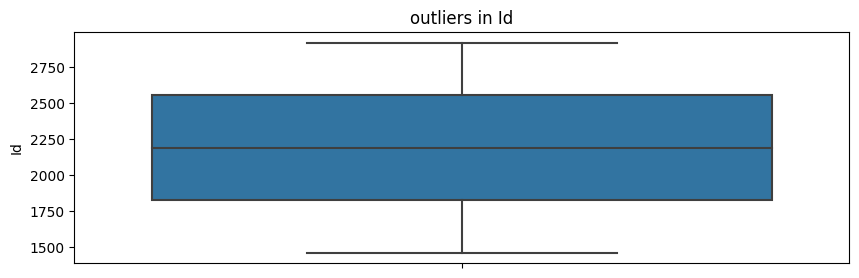

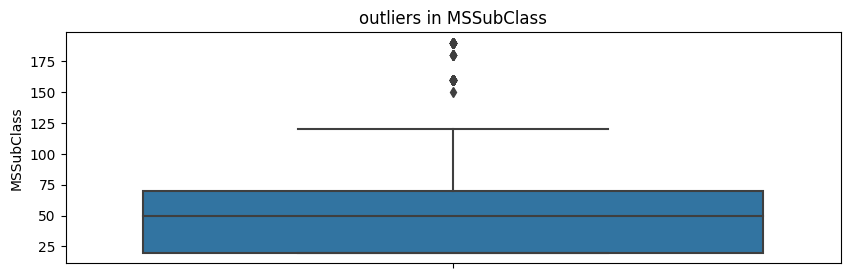

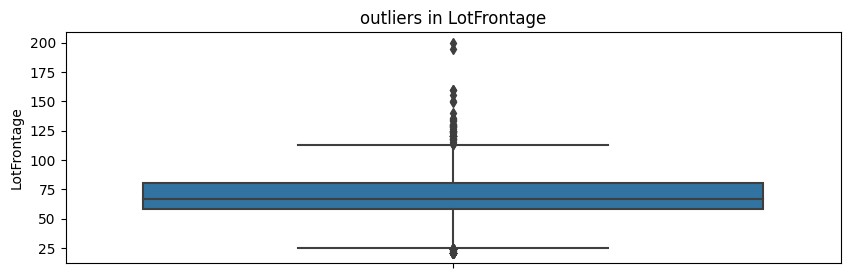

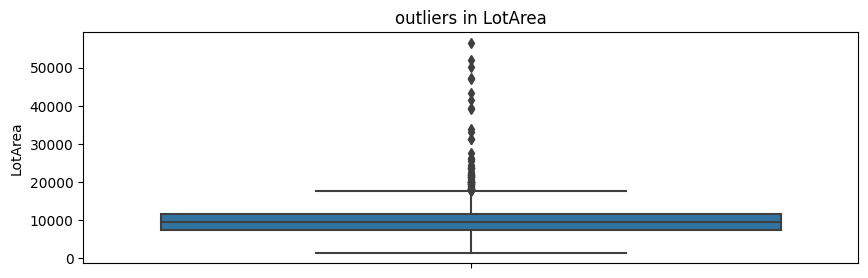

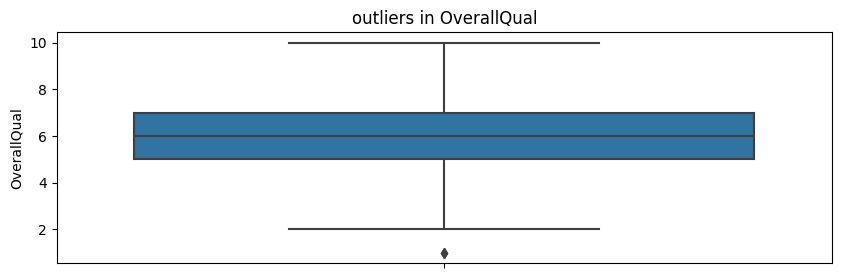

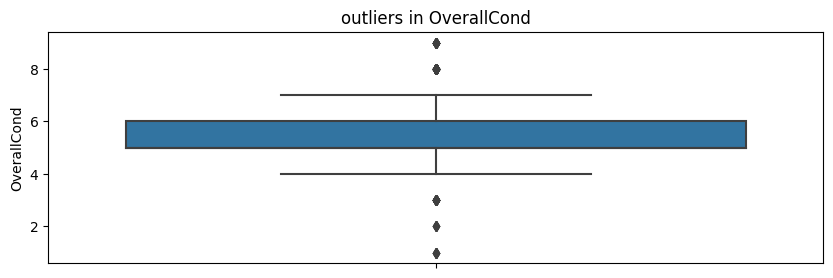

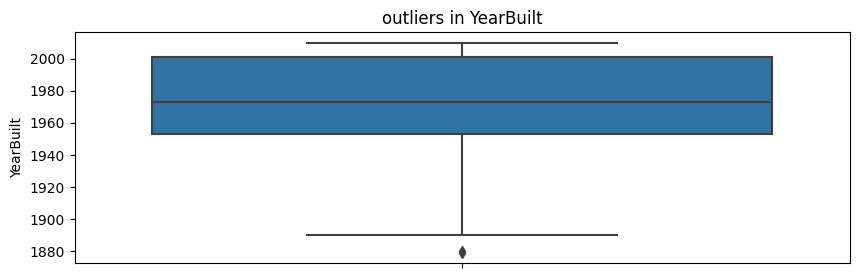

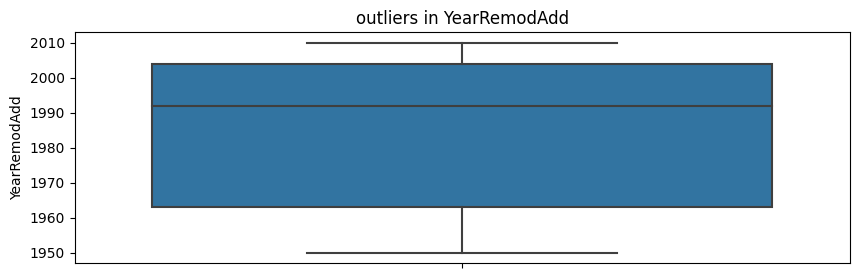

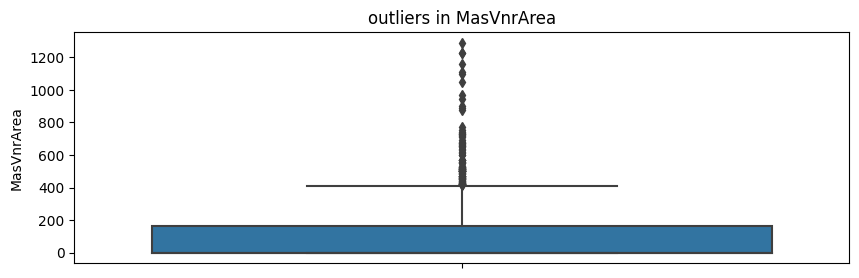

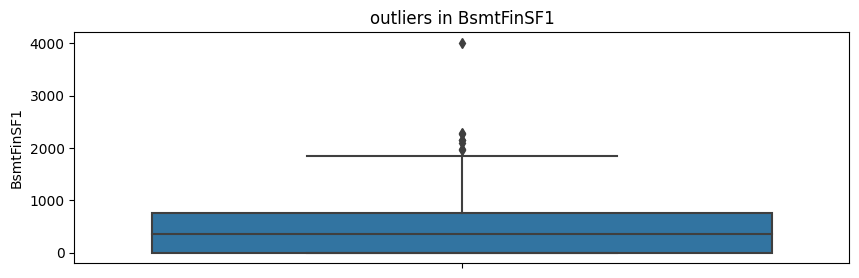

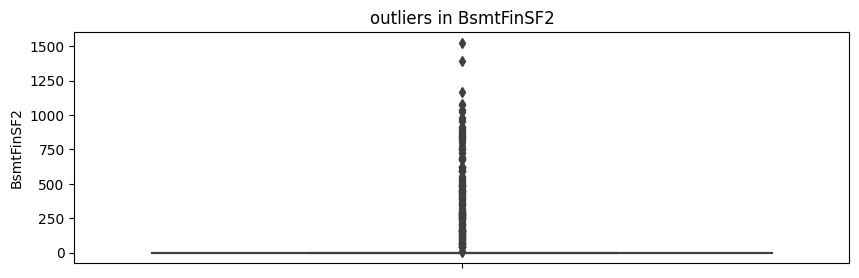

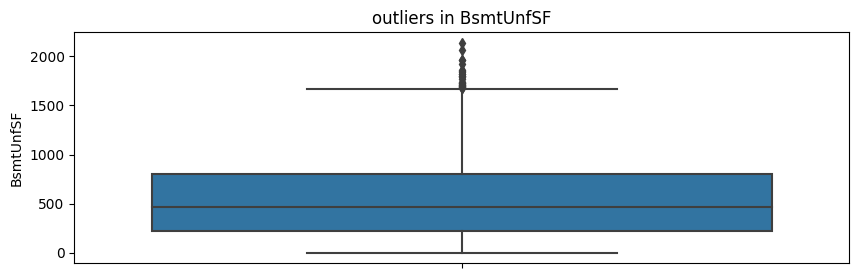

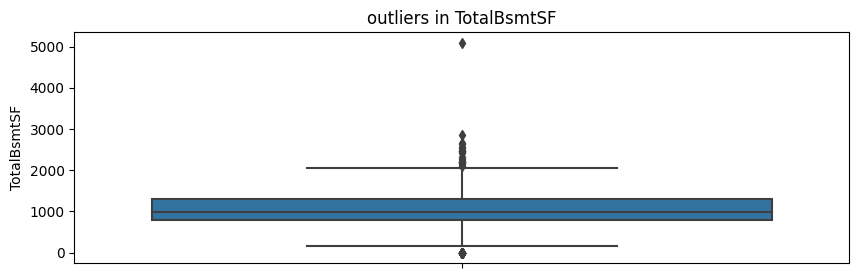

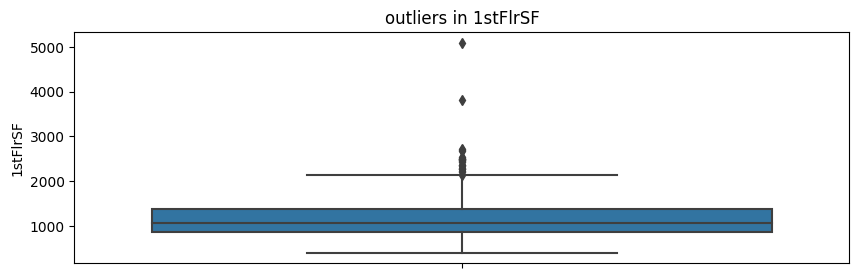

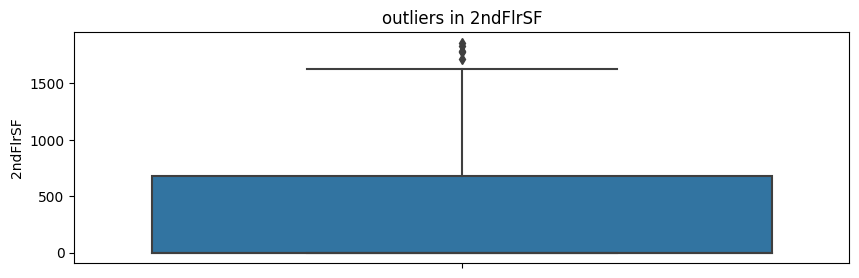

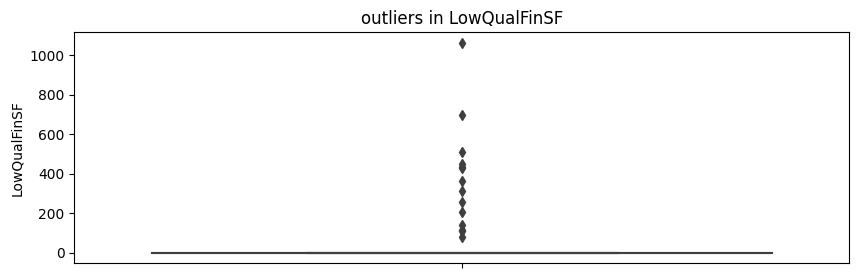

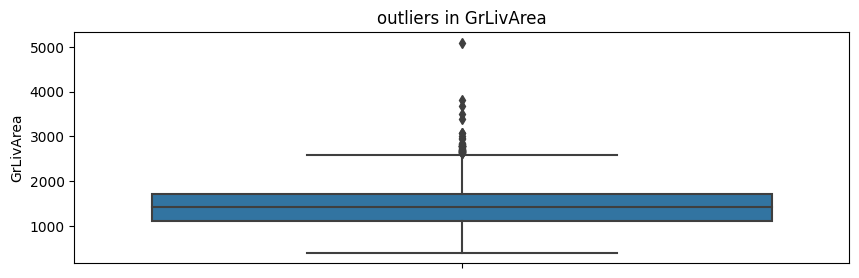

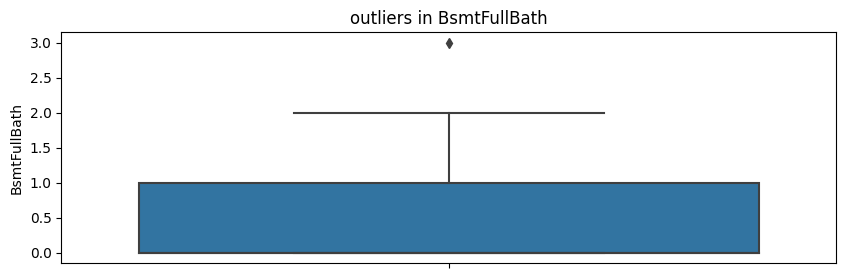

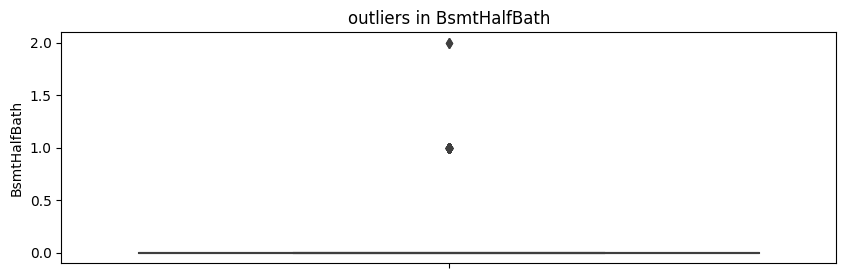

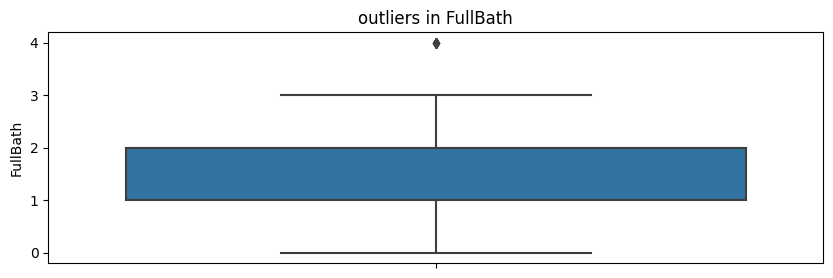

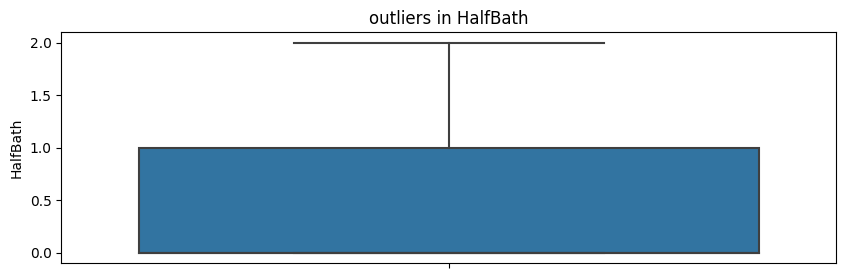

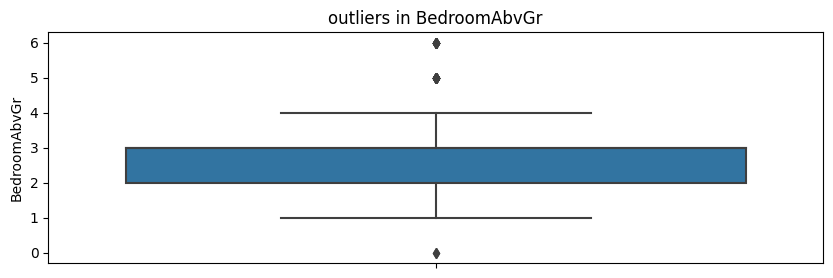

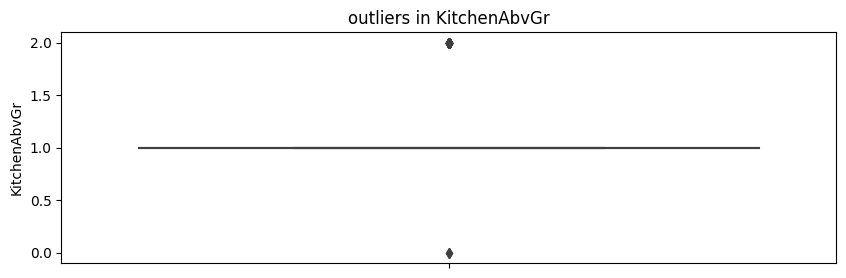

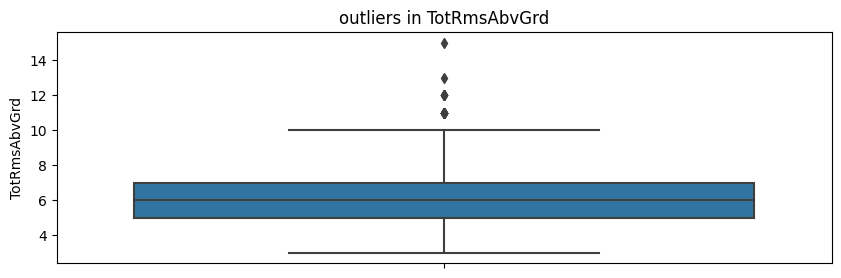

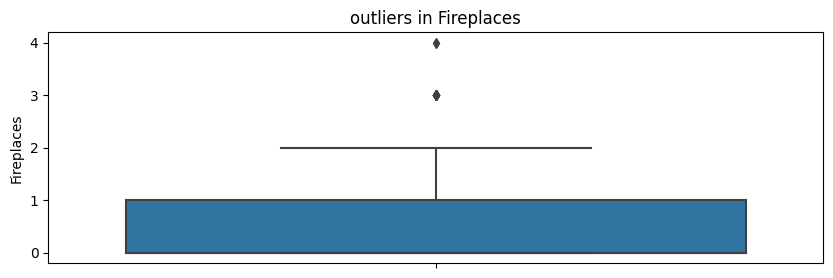

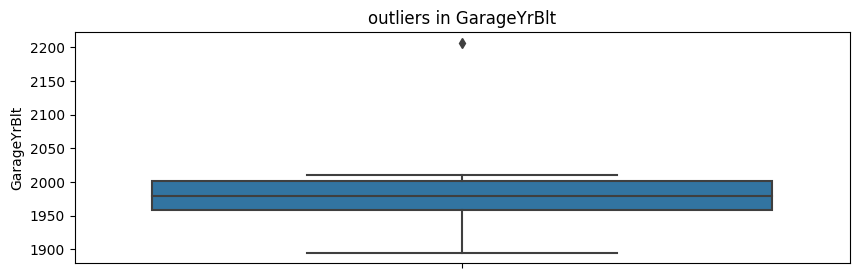

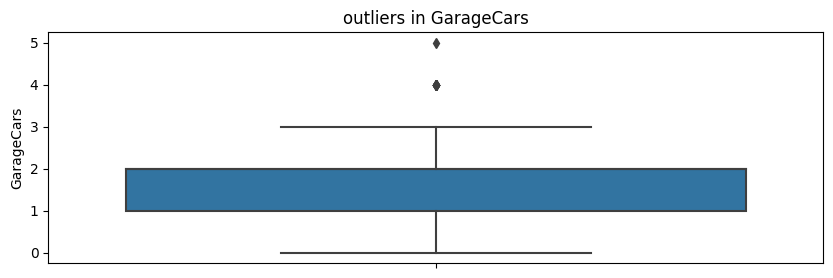

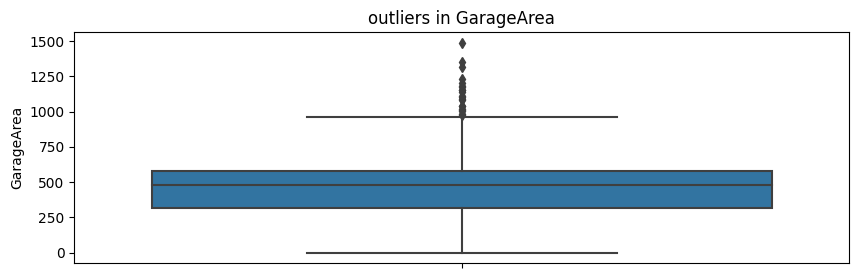

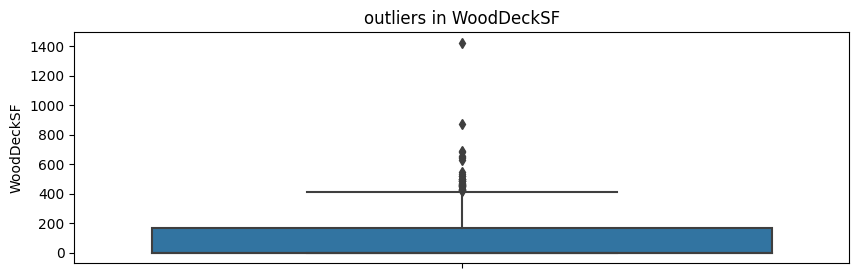

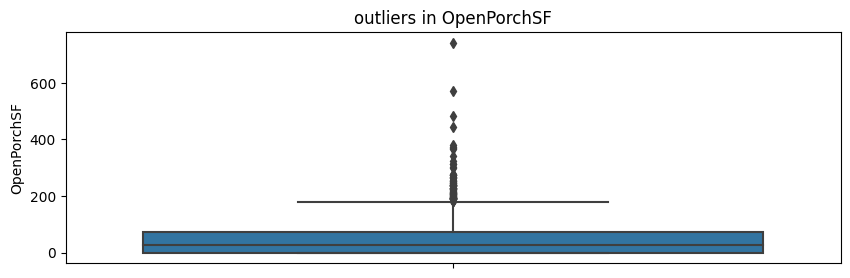

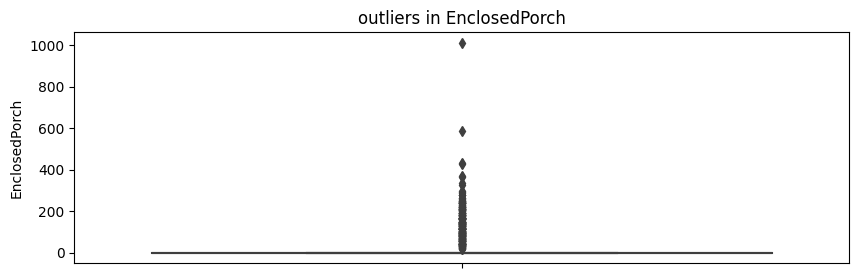

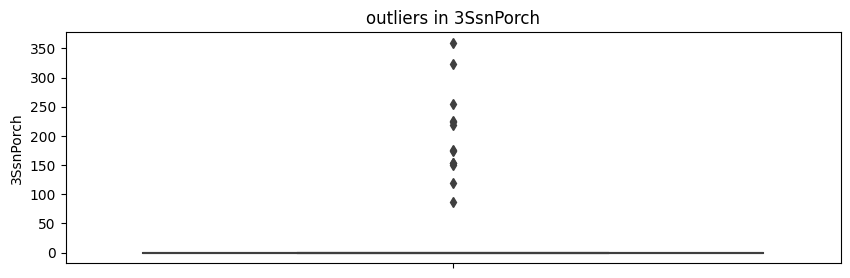

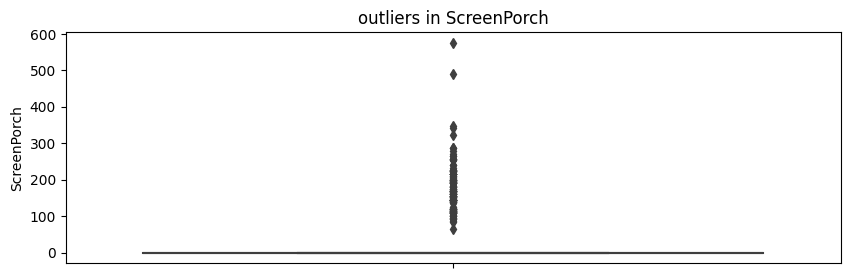

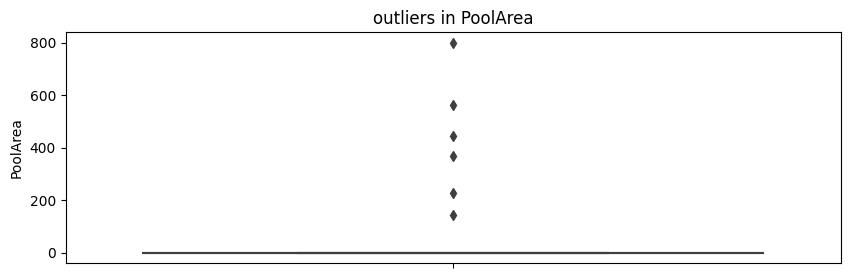

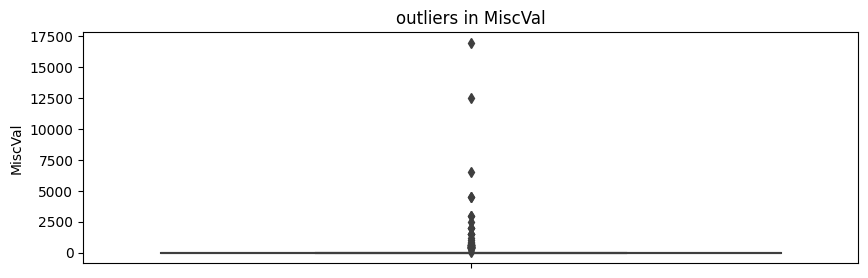

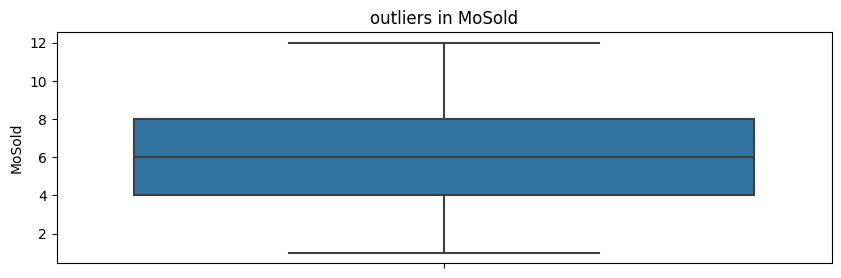

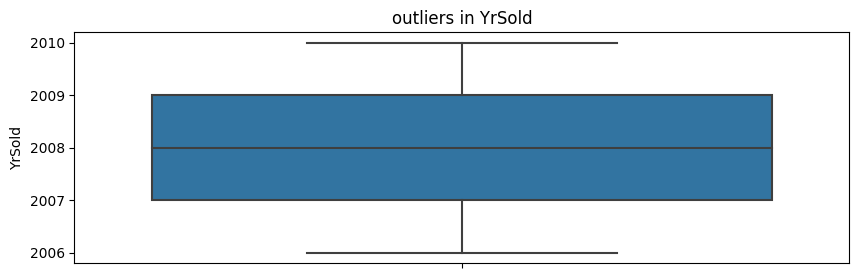

In [231]:
for col in test_num_df:
    plt.figure(figsize=(10, 3))
    sns.boxplot(y=house_test_data[col])
    plt.title(f"outliers in {col}")
    plt.ylabel(col)
    plt.show()

In [232]:
test_num_df["GarageArea"].describe()

count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [233]:
Q1 = test_num_df["GarageArea"].describe().values[4]
Q3 = test_num_df["GarageArea"].describe().values[6]
IQR = Q3 - Q1
IQR

258.0

In [234]:

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

In [235]:

test_num_df['GarageArea'] = test_num_df['GarageArea'].clip(lower=lower, upper=upper)
test_num_df['GarageArea']

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


0       730.0
1       312.0
2       482.0
3       470.0
4       506.0
        ...  
1454      0.0
1455    286.0
1456    576.0
1457      0.0
1458    650.0
Name: GarageArea, Length: 1459, dtype: float64

In [236]:
home_test_data=pd.concat([test_cat_df,test_num_df],axis=1)
home_test_data


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,730.0,140,0,0,0,120,0,0,6,2010
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,312.0,393,36,0,0,0,0,12500,6,2010
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,482.0,212,34,0,0,0,0,0,3,2010
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,470.0,360,36,0,0,0,0,0,6,2010
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,0.0,0,0,0,0,0,0,0,6,2006
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,286.0,0,24,0,0,0,0,0,4,2006
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,576.0,474,0,0,0,0,0,0,9,2006
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,0.0,80,32,0,0,0,0,700,7,2006


In [237]:
home_test_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition', 'Id', 'MSSubClass', 'LotFrontage',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodD

In [238]:
x_test_cat_col=home_test_data.select_dtypes(include="object")
x_test_num_col=home_test_data.select_dtypes(include=["int","float"])

In [239]:
x_test_cat_col.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [240]:
x_test_cat_col.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [241]:
x_test_num_col.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [242]:
test_nominal_df = x_test_cat_col[[
    'MSZoning','Street','LandContour','Utilities','LotConfig',
    'Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
    'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation',
    'Heating','CentralAir','Electrical','GarageType','SaleType','SaleCondition'
]]
test_nominal_df

,MSZoning,Street,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,RoofMatl,Exterior1st,Exterior2nd,Foundation,Heating,CentralAir,Electrical,GarageType,SaleType,SaleCondition
0,RH,Pave,Lvl,AllPub,Inside,NAmes,Feedr,Norm,1Fam,1Story,...,CompShg,VinylSd,VinylSd,CBlock,GasA,Y,SBrkr,Attchd,WD,Normal
1,RL,Pave,Lvl,AllPub,Corner,NAmes,Norm,Norm,1Fam,1Story,...,CompShg,Wd Sdng,Wd Sdng,CBlock,GasA,Y,SBrkr,Attchd,WD,Normal
2,RL,Pave,Lvl,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,...,CompShg,VinylSd,VinylSd,PConc,GasA,Y,SBrkr,Attchd,WD,Normal
3,RL,Pave,Lvl,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,...,CompShg,VinylSd,VinylSd,PConc,GasA,Y,SBrkr,Attchd,WD,Normal
4,RL,Pave,HLS,AllPub,Inside,StoneBr,Norm,Norm,TwnhsE,1Story,...,CompShg,HdBoard,HdBoard,PConc,GasA,Y,SBrkr,Attchd,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Lvl,AllPub,Inside,MeadowV,Norm,Norm,Twnhs,2Story,...,CompShg,CemntBd,CmentBd,CBlock,GasA,Y,SBrkr,NaN,WD,Normal
1455,RM,Pave,Lvl,AllPub,Inside,MeadowV,Norm,Norm,TwnhsE,2Story,...,CompShg,CemntBd,CmentBd,CBlock,GasA,Y,SBrkr,CarPort,WD,Abnorml
1456,RL,Pave,Lvl,AllPub,Inside,Mitchel,Norm,Norm,1Fam,1Story,...,CompShg,VinylSd,VinylSd,CBlock,GasA,Y,SBrkr,Detchd,WD,Abnorml
1457,RL,Pave,Lvl,AllPub,Inside,Mitchel,Norm,Norm,1Fam,SFoyer,...,CompShg,HdBoard,Wd Shng,PConc,GasA,Y,SBrkr,NaN,WD,Normal


In [243]:
test_nominal_df=pd.get_dummies(test_nominal_df)
test_nominal_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LandContour_Bnk,LandContour_HLS,LandContour_Low,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,False,False,False,True,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,False,False,False,False,True,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1455,False,False,False,False,True,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1456,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1457,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [244]:
test_nominal_df.select_dtypes(include="object")

""
0
1
2
3
4
...
1454
1455
1456
1457


In [245]:
test_ordinal_df = [
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",

    "Functional",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    
    "PavedDrive",
    "LotShape",
    "LandSlope"
]
test_ordinal_df

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'LotShape',
 'LandSlope']

In [246]:
test_ordinal_df = x_test_cat_col[test_ordinal_df].copy()
test_ordinal_df

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,LotShape,LandSlope
0,TA,TA,TA,TA,No,Rec,LwQ,TA,TA,Typ,Unf,TA,TA,Y,Reg,Gtl
1,TA,TA,TA,TA,No,ALQ,Unf,TA,Gd,Typ,Unf,TA,TA,Y,IR1,Gtl
2,TA,TA,Gd,TA,No,GLQ,Unf,Gd,TA,Typ,Fin,TA,TA,Y,IR1,Gtl
3,TA,TA,TA,TA,No,GLQ,Unf,Ex,Gd,Typ,Fin,TA,TA,Y,IR1,Gtl
4,Gd,TA,Gd,TA,No,ALQ,Unf,Ex,Gd,Typ,RFn,TA,TA,Y,IR1,Gtl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,TA,TA,TA,TA,No,Unf,Unf,Gd,TA,Typ,NaN,NaN,NaN,Y,Reg,Gtl
1455,TA,TA,TA,TA,No,Rec,Unf,TA,TA,Typ,Unf,TA,TA,Y,Reg,Gtl
1456,TA,TA,TA,TA,No,ALQ,Unf,Ex,TA,Typ,Unf,TA,TA,Y,Reg,Gtl
1457,TA,TA,Gd,TA,Av,GLQ,Unf,TA,TA,Typ,NaN,NaN,NaN,Y,Reg,Gtl


In [247]:
ordinal_mapping = {
    'LotShape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
    'LandSlope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},

    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},

    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},

    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},
    'BsmtFinType2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0},

    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},

    'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1},

    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},

    'PavedDrive': {'Y': 3, 'P': 2, 'N': 1}
}
ordinal_mapping

{'LotShape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1},
 'LandSlope': {'Gtl': 3, 'Mod': 2, 'Sev': 1},
 'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
 'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
 'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
 'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
 'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0},
 'BsmtFinType1': {'GLQ': 6,
  'ALQ': 5,
  'BLQ': 4,
  'Rec': 3,
  'LwQ': 2,
  'Unf': 1,
  'NA': 0},
 'BsmtFinType2': {'GLQ': 6,
  'ALQ': 5,
  'BLQ': 4,
  'Rec': 3,
  'LwQ': 2,
  'Unf': 1,
  'NA': 0},
 'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
 'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
 'Functional': {'Typ': 8,
  'Min1': 7,
  'Min2': 6,
  'Mod': 5,
  'Maj1': 4,
  'Maj2': 3,
  'Sev': 2,
  'Sal': 1},
 'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0},
 'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0},
 'Garag

In [248]:
for col, mapping in ordinal_mapping.items():
    if mapping is not None:
        test_ordinal_df[col] = test_ordinal_df[col].map(mapping)

In [249]:
test_ordinal_df.head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,GarageFinish,GarageQual,GarageCond,PavedDrive,LotShape,LandSlope
0,3,3,3.0,3.0,1.0,3.0,2.0,3,3.0,8.0,1.0,3.0,3.0,3,4,3
1,3,3,3.0,3.0,1.0,5.0,1.0,3,4.0,8.0,1.0,3.0,3.0,3,3,3
2,3,3,4.0,3.0,1.0,6.0,1.0,4,3.0,8.0,3.0,3.0,3.0,3,3,3
3,3,3,3.0,3.0,1.0,6.0,1.0,5,4.0,8.0,3.0,3.0,3.0,3,3,3
4,4,3,4.0,3.0,1.0,5.0,1.0,5,4.0,8.0,2.0,3.0,3.0,3,3,3


In [250]:
test_ordinal_df.select_dtypes(include = "object")

""
0
1
2
3
4
...
1454
1455
1456
1457


In [251]:
x_test_cat_col  =pd.concat([test_ordinal_df, test_nominal_df], axis = 1)

In [252]:
x_test_cat_col

,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,Functional,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,3,3,3.0,3.0,1.0,3.0,2.0,3,3.0,8.0,...,False,False,False,True,False,False,False,False,True,False
1,3,3,3.0,3.0,1.0,5.0,1.0,3,4.0,8.0,...,False,False,False,True,False,False,False,False,True,False
2,3,3,4.0,3.0,1.0,6.0,1.0,4,3.0,8.0,...,False,False,False,True,False,False,False,False,True,False
3,3,3,3.0,3.0,1.0,6.0,1.0,5,4.0,8.0,...,False,False,False,True,False,False,False,False,True,False
4,4,3,4.0,3.0,1.0,5.0,1.0,5,4.0,8.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,3,3.0,3.0,1.0,1.0,1.0,4,3.0,8.0,...,False,False,False,True,False,False,False,False,True,False
1455,3,3,3.0,3.0,1.0,3.0,1.0,3,3.0,8.0,...,False,False,False,True,True,False,False,False,False,False
1456,3,3,3.0,3.0,1.0,5.0,1.0,5,3.0,8.0,...,False,False,False,True,True,False,False,False,False,False
1457,3,3,4.0,3.0,3.0,6.0,1.0,3,3.0,8.0,...,False,False,False,True,False,False,False,False,True,False


In [253]:
X_final = pd.concat([x_test_cat_col,x_test_num_col], axis = 1)

In [254]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 196 entries, ExterQual to YrSold
dtypes: bool(143), float64(21), int64(32)
memory usage: 808.0 KB


In [255]:
X_final.columns

Index(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'Functional',
       ...
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object', length=196)

In [256]:
X_final.shape

(1459, 196)

In [257]:
X_final = X_final.reindex(columns=X_train.columns, fill_value=0)

In [258]:
X_final

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,False,True,False,False,False,True,False
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,False,False,False,False,True,False,False,False,True,False


In [259]:
print(X_train.shape)

print(X_final.shape)


(1168, 222)
(1459, 222)


In [261]:
test_predictions = ridge.predict(X_final)

ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
test_predictions

#  creating submission file

In [ ]:
submission = pd.DataFrame({
    "Id": test_id ,
    "SalePrice": test_predictions
})


In [ ]:
submission

In [ ]:
submission = submission[['Id', 'SalePrice']]
submission.to_csv('submission.csv', index=False)